### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.8.2'

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
32 * 32

1024

### Visualizing the images

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


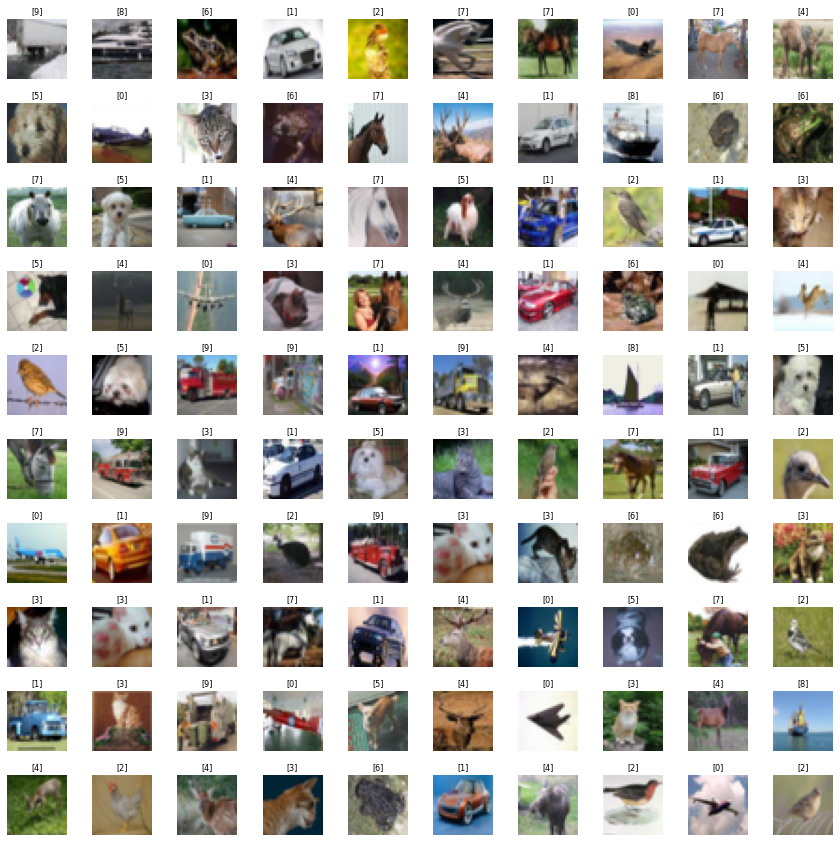

In [7]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

### Pre-processing the images

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Building and training the convolutional autoencoder

In [10]:


autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Encoded image

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                        

In [12]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 23s 7ms/step - loss: 0.5818 - accuracy: 0.6571
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5680 - accuracy: 0.7252
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5648 - accuracy: 0.7424
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5633 - accuracy: 0.7493
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5623 - accuracy: 0.7539
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5616 - accuracy: 0.7586
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5612 - accuracy: 0.7593
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5608 - accuracy: 0.7612
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5606 - accuracy: 0.7614
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - l

### Encoding and decoding the test images

In [14]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_2').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128   

In [15]:
coded_test_images = encoder.predict(X_test)

In [16]:
coded_test_images.shape

(10000, 4, 4, 16)

In [17]:
coded_test_images[0]

array([[[ 0.6139276 , -0.4377483 , -0.28706813,  0.15328702,
         -0.05641623,  0.24873675,  0.22838041, -0.1689372 ,
          0.12079617, -0.26467288, -0.06050327,  0.06705159,
          0.3253674 , -0.36642197,  0.1252825 ,  0.18161424],
        [ 0.52178836, -0.6442517 , -0.1417507 ,  0.10672364,
         -0.15972131,  0.37183297,  0.19045496,  0.1101232 ,
         -0.11420275, -0.01564049,  0.07672106, -0.1342337 ,
          0.06536765, -0.3314343 ,  0.06444444,  0.27847272],
        [ 0.13729215, -0.36491334, -0.2688001 , -0.04351288,
         -0.08099847, -0.00842039,  0.04928671, -0.19820769,
         -0.09037784,  0.01676621,  0.05041152,  0.1243862 ,
         -0.0372356 , -0.0351335 ,  0.2916242 , -0.02332664],
        [ 0.3214904 , -0.277927  , -0.30235803,  0.27055848,
         -0.21844709,  0.1803045 ,  0.01740038, -0.21340546,
          0.1583772 , -0.1346434 ,  0.16458648,  0.39062184,
          0.19245997, -0.25817844,  0.31787014,  0.07243297]],

       [[-0.149109

In [18]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 32, 32, 3)

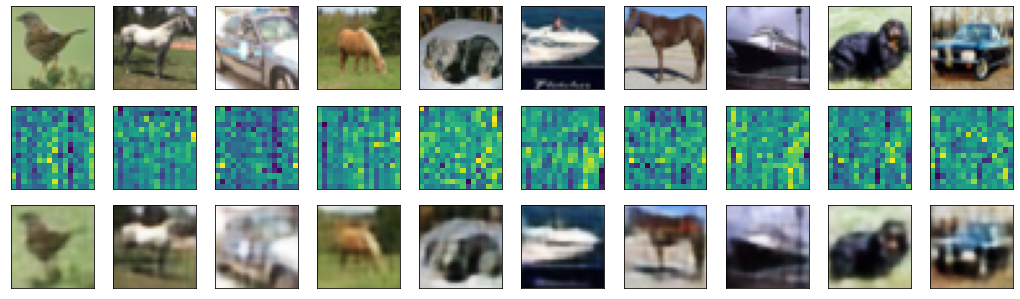

In [19]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())
    
  # Coded image
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())
    
  # Decoded image
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())